## Проект - Банки, анализ оттока клиентов. Обзор данных

### Описание задачи

Заказчик - отдел маркетинга

Моя задача как джуниор аналитика в компании  - проанализировать клиентов регионального банка и <b>выделить сегменты </b> клиентов, которые склонны уходить из банка, мне нужно <b> дать таргетированные рекомендации </b> отделу маркетинга прежде всего по сегменту, который наиболее склонен к оттоку, а затем по каждому сегменту клиентов, 

<b> Цель рекомендаций - снизить отток </b>.

Чуть детальнее - нужно:
    
- изучить данные 
- провести исследовательский анализ данных
- определить все значимые признаки отточности (интервалы значений характеристик, которые связаны с
повышенным оттоком, сравнить портреты типичных клиентов, которые склонны и не склонны уходить из банка и т.д)
- сформулировать и проверить статистические гипотезы
- объединяя признаки отточности, сформировать сегменты, приоритизировать их и дать рекомендации по каждому из них

### Описание данных 

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:
- `USERID` — идентификатор пользователя
- `score` — баллы кредитного скоринга (чем выше, тем больше вероятность что кредит дадут)
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — количество баллов собственности (чем выше, тем больше вероятность, что кредит дадут)
- `balance` — баланс на счёте (именно на счете, не на кредитке например)
- `products` — количество продуктов, которыми пользуется клиент (кроме кредитки)
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент (совершал ли операции в отчетном периоде)
- `EST_SALARY` — оценочный доход клиента,
- `сhurn` — признак оттока.

### Как буду решать задачу, что буду делать

Я сделаю следующее:

- обзор данных
- затем предобработку
- затем исследовательский анализ данных с использованием в том числе статистических методов, чтобы качественно разделить всех клиентов на сегменты, которые более и менее склонны к оттоку
- составлю портреты пользователей, которые более и менее склонны к оттоку 
- дам рекомендации по удержанию клиентов прежде всего из сегмента наиболее склонного к оттоку, чтобы предотвратить отток этих клиентов
- дам рекомендации по остальным сегментам
- составлю краткую и понятную презентацию для заказчика

### Какие гипотезы буду проверять

- нужно проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались 
- нужно проверить гипотезу о том, влияет ли кол-во баллов собственности на склонность к оттоку

## Изучу датасет

### Загружаю библиотеки

In [1]:
pip install phik

     |████████████████████████████████| 686 kB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import phik
from phik import phik_matrix
from scipy import stats as st
from scipy.stats import mannwhitneyu
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

### Загружаю данные

In [3]:
banks = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

### Использую функцию для того, чтобы посмотреть на данные

In [4]:
def analyze_dataframes(dataframes):
    """
    Анализирует датафреймы, выводит информацию, описательную статистику,
    количество пропущенных значений и первые строки каждого датафрейма.

    Параметры:
    dataframes (dict): Словарь, где ключи - это строковые названия датафреймов, 
    а значения - сами датафреймы pandas.

    Возвращает:
    Функция выводит анализируемую информацию в стандартный вывод.

    """
    for df_name, df in dataframes.items():
        
        # Вывожу инфо о каждом датафрейме
        print(f"Info for DataFrame {df_name}:\n")
        df.info()
        print("\n" + "="*50 + "\n")  # Для разделения вывода

        # Вывожу describe для каждого датафрейма
        print(f"Describe for DataFrame {df_name}:\n")
        print(df.describe())
        print("\n" + "="*50 + "\n")  # Для разделения вывода

        # Считаю количество пропущенных значений
        print(f"Missing Values in DataFrame {df_name}:\n")
        missing_values = df.isnull().sum()
        print(missing_values)
        print("\n" + "="*50 + "\n")  # Для разделения вывода

        # Вывожу первые строки датафрейма
        print(f"Head of DataFrame {df_name}:\n")
        print(df.head())
        print("\n" + "="*50 + "\n")  # Для разделения вывода

# Делаю словарь с датафреймами
dataframes = {
    "banks": banks
}

# Вызываю функцию
analyze_dataframes(dataframes)

Info for DataFrame banks:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Describe for DataFrame banks:

             USERID         score          age        equity       balance  \
count   10000.00000  10000.000000  9974.000000  10000.000000  7.705000e+03

Не нравится, как отображаются данные, поменяю формат отображения

In [5]:
pd.options.display.float_format = '{:.2f}'.format

### Что мне показала функция:

- названия столбцов нужно привести к lower case
- есть пропуски в balance (2295) и age (26)

по типам данных:
- age можно (но не обязательно) привести к int

по describe:
- значения скоринга между 642 и 1000
- возраст от 18 до 86
- значения баллов собственности - от 0 до 9
- сумма на балансе - от 0 до 119 113 552 
- кол-во продуктов, которым пользуется клиент - от 0 до 5
- оценочная з/п от 2546.3 до 1 395 064.4
- в целом распределение выглядит адекватным, нет явно неправдоподобных цифр. оценочная з/п в 2500 - да выглядит маловато, но это лишь оценка, точных данных нет, и клиенту 18 лет = он может являться клиентом банка, почему нет, просто денег у него еще мало

### Общие выводы

- нужно разобраться с причинами пропусков (в balance и age) - MAR, MCAR, MNAR 
- решить, что делать с пропусками
- названия столбцов нужно привести к lower case
- поискать явные/неявные дубликаты

## Предобработка данных

### Что буду делать на этом этапе

Необходимо сделать следующее:

- переименовать названия столбцов - привести к lower case
- узнать природу пропусков в balance и age
- решить, что делать с пропусками - поставить заглушки на пропусках или удалить или вставить медиану/среднее или не трогать вовсе
- поискать и удалить явные дубликаты
- поискать и исправить/удалить неявные дубликаты

### Приведу названия столбцов к lower case

In [6]:
banks.columns = banks.columns.str.lower()

In [7]:
banks.head(3)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0


### Выясню природу пропусков

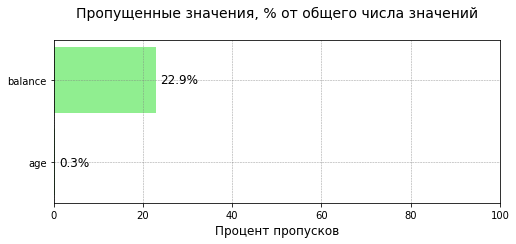

In [8]:
def pass_value_barh(df):
    fig, ax = plt.subplots(figsize=(8, 3))

    try:
        # Создам Series с процентами пропусков
        missing_percentage = (df.isna().mean() * 100)

        # Отберу только признаки с пропусками
        missing_data = missing_percentage[missing_percentage > 0]

        # Создам горизонтальный бар-график
        ax.barh(missing_data.index, missing_data, color='lightgreen')
        ax.set_xlabel('% Пропусков', fontsize=14, color='SteelBlue')
        ax.set_title('Пропущенные значения, % от общего числа значений' + "\n", fontsize=14)

        # Добавлю численные значения над столбцами
        for index, value in enumerate(missing_data):
            ax.text(value + 1, index, f"{value:.1f}%", va='center', fontsize=12, color='black')

        plt.grid(visible=True, color='grey', linestyle='--', linewidth=0.5, alpha=0.8)
        plt.xlim(0, 100)

        # Добавлю подпись "процент пропусков" внизу
        plt.xlabel('Процент пропусков', fontsize=12, color='Black')
    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции')

pass_value_barh(banks)


- 0.3 процента пропусков - немного, но причину пропусков попробую выяснить
- а вот 22.9 процента пропусков - это много, тут уделю особое внимание

In [9]:
# Создам бинарный признак для колонки balance
banks['balance_missing'] = banks['balance'].isna().astype(int)

# Создам бинарный признак для колонки age
banks['age_missing'] = banks['age'].isna().astype(int)

In [10]:
# Вычислю корреляцию для двух колонок
correlation_balance = banks.corr()['balance_missing']
correlation_age = banks.corr()['age_missing']

#### Пропуски в balance

In [11]:
print("Корреляция с бинарным признаком 'balance_missing':")
print(correlation_balance)

Корреляция с бинарным признаком 'balance_missing':
userid             0.00
score              0.14
age               -0.03
equity            -0.71
balance             NaN
products          -0.49
credit_card        0.16
last_activity      0.03
est_salary         0.31
churn             -0.25
balance_missing    1.00
age_missing        0.05
Name: balance_missing, dtype: float64


здесь я вижу значительную корреляцию:

- с кол-вом продуктов - корреляция отрицательная, по шкале Чеддока это уже средняя заметная корреляция (-0.5), что может означать, что клиенты, к-рые используют меньше продуктов, склонны иметь больше пропусков в balance
- с баллом собственности - корреляция отрицательная и по шкале Чеддока уже считается высокой (-0.7), это указывает на то, что количество баллов собственности сильно связано с отсутствием пропусков в 'balance'. Вероятно, клиенты с большим количеством баллов собственности имеют меньше пропусков в balance

Могу предположить, что пропуски здесь возникли не случайно (MNAR) - логика "чем меньше продуктов, тем больше пропусков в балансе" и "чем меньше баллов собственности, тем больше пропусков в балансе" может указывать на то, что пропуски на самом деле равны нулю, однако точно это утверждать нельзя

In [12]:
zero_balance_count = (banks['balance'] == 0).sum()

In [13]:
zero_balance_count

2

Нулей в процентном соотношении от  общего кол-ва действительно маловато - 0,02%. Вероятно, и правда пропуски здесь означают нули, но заполнять пропуски и тем более удалять их не буду. Если что-то нужно будет сделать с этими пропусками далее, я это сделаю. 

#### Пропуски в age

In [14]:
print("\nКорреляция с бинарным признаком 'age_missing':")
print(correlation_age)


Корреляция с бинарным признаком 'age_missing':
userid             0.03
score              0.01
age                 NaN
equity            -0.03
balance            0.01
products          -0.03
credit_card        0.01
last_activity      0.03
est_salary         0.01
churn             -0.02
balance_missing    0.05
age_missing        1.00
Name: age_missing, dtype: float64


- Здесь связь между наличием пропусков в возрасте и другими признаками - очень слабая, не имеет практического значения 
- = можно утверждать, что пропуски в age не зависят от других переменных
- = можно сказать, что пропуски возникли случайно, например: случайные ошибки при сборе данных, из-за которых информация о возрасте клиента может быть утеряна, либо причины это технические проблемы, либо человеческий фактор (например ДИ случайно кривой заппрос написал и для части клиентов возраст был потерян)
- не буду трогать. Если потребуется для целей исследования - удалю, тем более тут всего 26 строк, это очень низкий процент от кол-ва строк в датасете, выкинуть их нестрашно. Но пока не трогаю </font>

пропуски в возрасте скорее всего имеют полностью случайную природу (MCAR - missing completely at random) и не зависят от других переменных

### Посмотрю на явные дубликаты

In [15]:
banks.duplicated().sum() 

0

Ок, хорошо, явных дубликатов нет

### Посмотрю на неявные дубликаты

In [16]:
# Ищу неявные дубликаты во всем датасете
duplicate_rows = banks[banks.duplicated(keep=False)]

In [17]:
duplicate_rows

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing,age_missing


#### Посмотрю неявные дубликаты по user_id

In [18]:
# Нахожу все строки с неявными дубликатами по userid
duplicates_userid = banks[banks.duplicated(subset='userid', keep=False)]

In [19]:
duplicates_userid.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing,age_missing
7,218868,825.00,Ярославль,Ж,38.00,4,458145.40,2,1,1,68085.48,0,0,0
58,164676,860.00,Ярославль,М,37.00,5,648594.03,2,1,1,213586.86,1,0,0
150,185748,850.00,Рыбинск,М,36.00,5,1203376.67,2,0,1,89401.82,1,0,0
161,197364,928.00,Рыбинск,Ж,53.00,6,1347183.86,2,0,1,168189.49,1,0,0
231,190253,823.00,Рыбинск,М,37.00,4,373348.39,2,0,1,131947.92,1,0,0


Чтобы посмотреть на  эти пропуски детальнее, рандомно выберу 5 любых userid и выведу строки с этими 5 userid, чтобы посмотреть, чем они отличаются и чем похожи

In [20]:
random_userids = random.sample(duplicates_userid['userid'].tolist(), 5)

In [21]:
selected_rows = banks[banks['userid'].isin(random_userids)].sort_values(by='userid')

In [22]:
selected_rows

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing,age_missing
2941,172142,896.00,Ярославль,Ж,30.00,4,1009073.14,4,1,0,70866.29,1,0,0
6756,172142,751.00,Рыбинск,Ж,69.00,3,396568.03,2,0,1,45608.45,0,0,0
2226,195884,906.00,Ярославль,М,49.00,6,1354552.83,2,0,0,270678.42,1,0,0
9659,195884,767.00,Рыбинск,Ж,45.00,1,335652.56,3,1,1,100197.67,0,0,0
5889,206759,917.00,Ярославль,М,22.00,0,NaN,1,1,0,70617.52,0,1,0
8385,206759,915.00,Рыбинск,М,NaN,0,NaN,1,1,0,71179.53,0,1,1
3230,210135,974.00,Ярославль,Ж,50.00,5,5680148.93,4,1,1,338471.66,0,0,0
7236,210135,908.00,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0,0,1
6412,226550,939.00,Ярославль,М,34.00,0,NaN,1,1,1,145913.73,0,1,0
8070,226550,940.00,Рыбинск,М,NaN,0,NaN,1,0,1,147696.95,0,1,1


- вижу, что эти дубликаты дублируются только по userid, в остальном они отличаются по всем признакам
- вижу, что представленных городов - 2 - Ярославль и Рыбинск, видимо случилась какая-то несогласованность между банками в этих двух городах по userid, и эти одинаковые id были назначены разным людям в разных городах
- это нестрашно, т к userid это не тот признак, который может коррелировать с оттоком = для целей работы эти дубликаты не представляют никакой опасности и значения не имеют
- оставлю их как есть

### Уникальные значения balance

In [23]:
banks.products.unique()

array([2, 3, 1, 4, 5, 0])

In [24]:
products_zero = banks[banks['products'] == 0]
products_zero

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing,age_missing
8957,147837,962.00,Рыбинск,Ж,79.00,3,NaN,0,0,0,25063.96,1,1,0


Вижу, что есть одно значение, равное 0. Кол-во продуктов не может быть равно 0, удалю его.

In [25]:
banks.drop(banks[banks['products'] == 0].index, inplace=True)

In [26]:
products_zero = banks[banks['products'] == 0]
products_zero

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing,age_missing


### Избавлюсь от столбца userid

Этот столбец нам больше не нужен

In [27]:
banks.drop('userid', axis=1, inplace=True)

In [28]:
banks.head(3)

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing,age_missing
0,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,0,0
1,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,0,0
2,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,1,0


### Вывод по этапу предобработки

- с помощью str.lower() привела названия колонок к единообразному виду - к lower case
- выяснила, что пропуски в balance отрицательно коррелируют с кол-вом используемых банковских продуктов (0,5 - средняя корреляция) и кол-вом баллов собственности (0,7 - заметная корреляция), решила, что природа пропусков - MNAR и я могу при необходимости заменить их нулями. Но пока что оставила как есть
- выяснила, что корреляция между пропусками в age и другими признаками такая низкая, что это позволяет мне сказать, что зависимости между пропусками и признаками нет. Природа пропусков - MAR, скорее всего технич ошибка или человеческий фактор. С пропусками не стала ничего делать, оставила как есть
- обнаружила неявные дубликаты по userid, но там повторялись только сами userid, остальные признаки отличались. Это не представляет проблемы для целей исследования, поэтому я оставила их как есть
- обнаружила, что других явных и неявных дубликатов в датасете нет и это хорошо)
- убрала из датасета столбец userid, т к он больше не нужен
- убрала строку с неправильным значением 0 в products (значения 0 в этой колонке быть не должно), была всего одна строка, и я ее убрала

## Исследовательский анализ

Задачи - что и как буду делать:
- анализ распределения признаков в целом (без деления на тех что ушли в отток и остались) - гистограммы, столбчатые диаграммы
- анализ распределения признаков, в тч в разрезе оттока (непрерывные - ищем отточные интервалы, категориальные/дискретные - буду искать значения признака с оттоком выше, чем по банку - гистограммы, столбчатые диаграммы - по мере выполнения буду решать, какую визуализацию брать
- категориальные и дискретные признаки проанализирую с точки зрения поиска значения признака, в котором отток выше, чем по банку. Анализ распределения нужен для следующего этапа - формирования сегментов
- анализ портретов клиентов в разрезе оттока. Делаю в виде таблицы. В главном столбце - факт оттока. Считаю по каждому признаку разные меры центральной тенденции в зависимости от типа признака
- корреляционный анализ с помощью матрицы Phik
- интерпретация корреляционного анализа

### Смотрю на распределение признаков в целом

#### Смотрю средние значения по всему датасету

In [29]:
# Список колонок, для которых не нужно считать средние значения
exclude_columns = ['balance_missing', 'age_missing', 'gender']

# Расчет средних значений для остальных колонок
mean_values = banks.drop(columns=exclude_columns).mean(numeric_only=True)

In [30]:
mean_values

score              848.69
age                 42.73
equity               2.63
balance         827794.31
products             1.87
credit_card          0.68
last_activity        0.52
est_salary      147879.17
churn                0.18
dtype: float64

ок, 

- средний возраст 42 года, 
- среднее кол-во баллов собственности - 2,63
- среднее кол-во денег на балансе - около 828 тыс
- кол-во продуктов - 1.87
- кредитка есть у 68% клиентов
- 52% клиентов были активны в отчетный период
- средняя оценочная зп около 148 тыс
- уровень оттока по банку около 18%

понятно, что средние значения для непрерывных значений могут иметь выбросы, средних значений мало, поэтому на этом еще не все

#### Смотрю распределение по всему датасету

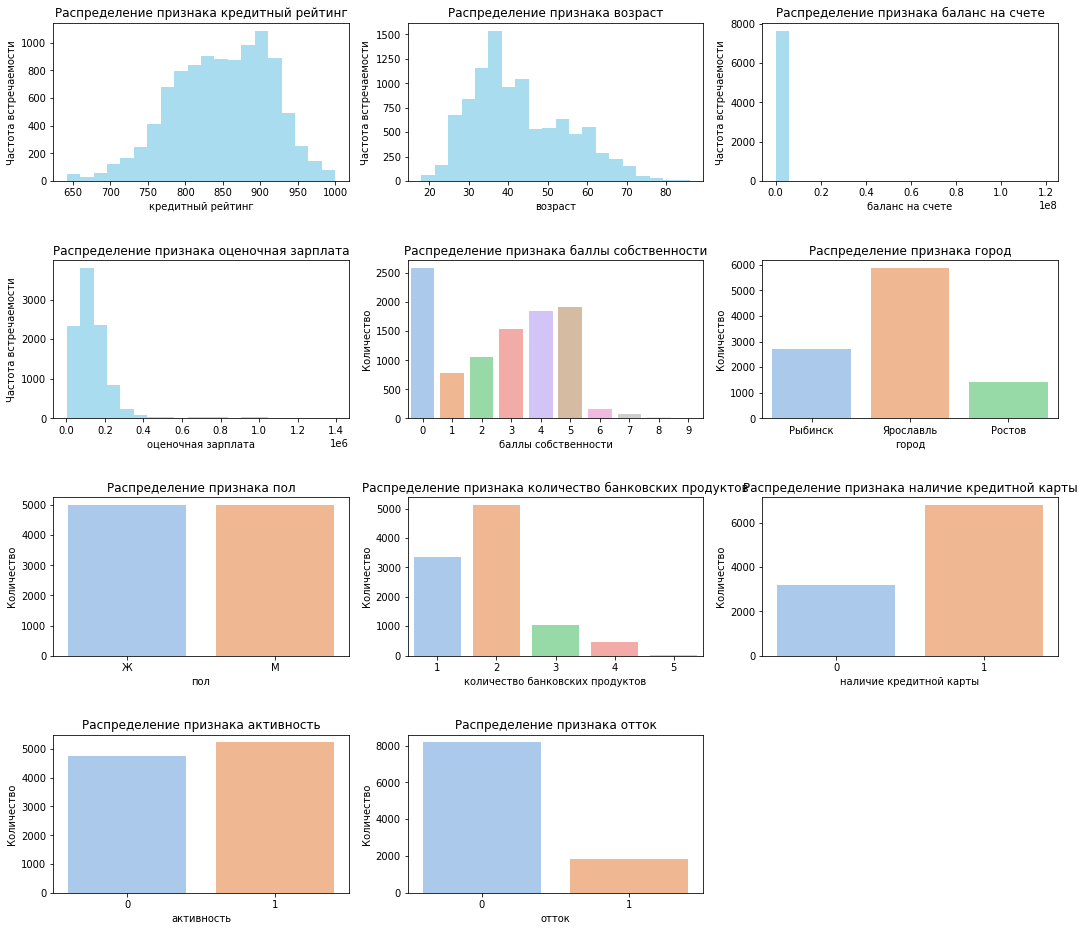

In [31]:
# Создаю фигуру и оси для графиков
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
plt.subplots_adjust(hspace=0.5)

# Графики для числовых признаков (score, age, balance, est_salary)
numeric_features = ['score', 'age', 'balance', 'est_salary']
numeric_feature_labels = ['кредитный рейтинг', 'возраст', 'баланс на счете', 'оценочная зарплата']
for i, (feature, label) in enumerate(zip(numeric_features, numeric_feature_labels)):
    row, col = i // 3, i % 3
    axes[row, col].hist(banks[feature].dropna(), bins=20, color='skyblue', alpha=0.7)
    axes[row, col].set_title(f'Распределение признака {label}')
    axes[row, col].set_xlabel(label)
    axes[row, col].set_ylabel('Частота встречаемости')

# График для категориального признака 'equity' 
#(пришлось отдельно сделать, в сетку никак не ложился)
row, col = len(numeric_features) // 3, len(numeric_features) % 3
sns.countplot(data=banks, x='equity', ax=axes[row, col], palette='pastel')
axes[row, col].set_title('Распределение признака баллы собственности')
axes[row, col].set_xlabel('баллы собственности')
axes[row, col].set_ylabel('Количество')

# Графики для остальных категориальных признаков 
#(city, gender, products, credit_card, last_activity, churn)
categorical_features = ['city', 'gender', 'products', 'credit_card', 'last_activity', 'churn']
categorical_feature_labels = ['город', 'пол', 'количество банковских продуктов', 
                              'наличие кредитной карты', 'активность', 'отток']

for i, (feature, label) in enumerate(zip(categorical_features, categorical_feature_labels)):
    row, col = (i + len(numeric_features) + 1) // 3, (i + len(numeric_features) + 1) % 3
    sns.countplot(data=banks, x=feature, ax=axes[row, col], palette='pastel')
    axes[row, col].set_title(f'Распределение признака {label}')
    axes[row, col].set_xlabel(label)
    axes[row, col].set_ylabel('Количество')

# Удаляю последнюю пустую ячейку 
if (len(numeric_features) + len(categorical_features)) % 3 != 0:
    fig.delaxes(axes[-1, -1])

# Вывожу графики
plt.show()

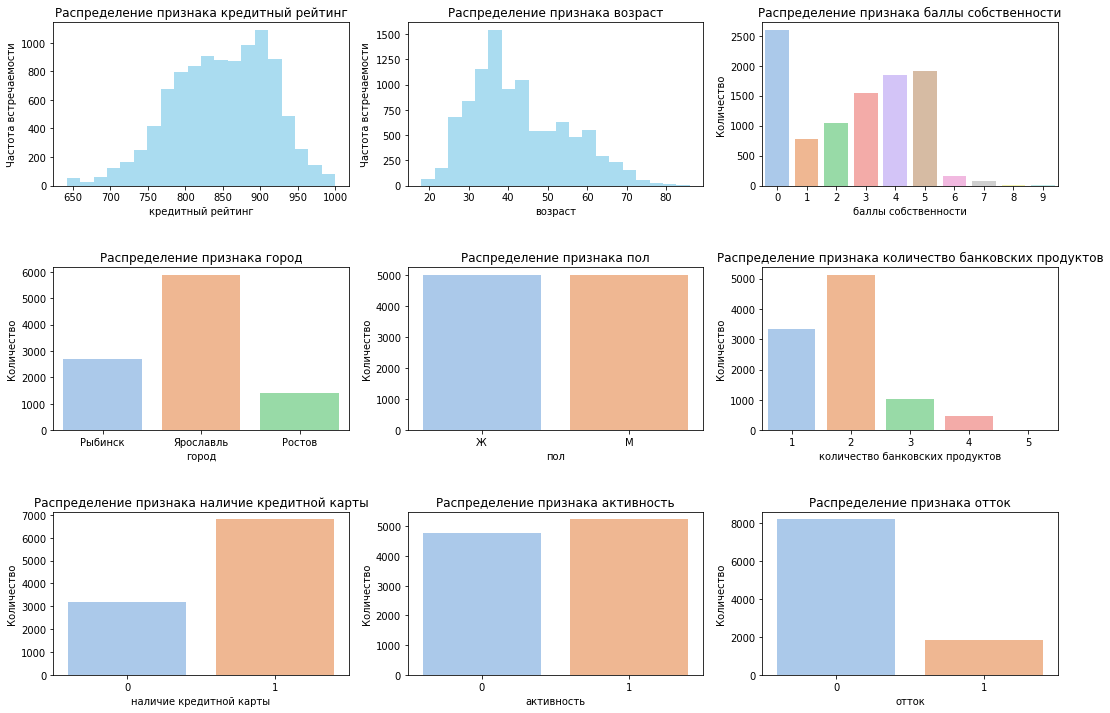

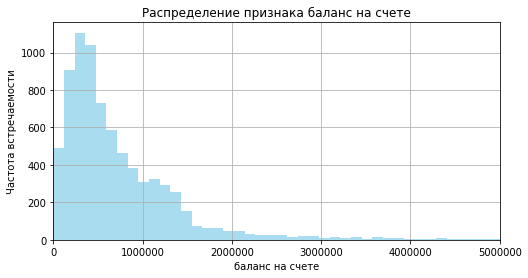

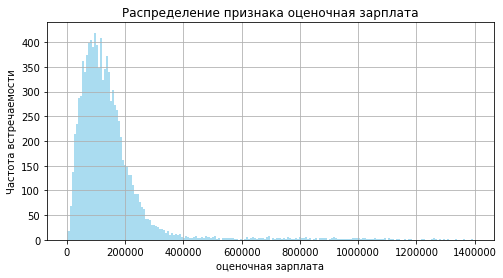

In [32]:
# Создаю фигуру и оси для графиков, теперь с меньшим числом осей
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))  # Уменьшил количество строк
plt.subplots_adjust(hspace=0.5)

# Убираю 'balance' и 'est_salary' из списка числовых признаков
numeric_features = ['score', 'age']
numeric_feature_labels = ['кредитный рейтинг', 'возраст']
for i, (feature, label) in enumerate(zip(numeric_features, numeric_feature_labels)):
    row, col = i // 3, i % 3
    axes[row, col].hist(banks[feature].dropna(), bins=20, color='skyblue', alpha=0.7)
    axes[row, col].set_title(f'Распределение признака {label}')
    axes[row, col].set_xlabel(label)
    axes[row, col].set_ylabel('Частота встречаемости')

# График для категориального признака 'equity' 
#(пришлось отдельно сделать, в сетку никак не ложился)
row, col = len(numeric_features) // 3, len(numeric_features) % 3
sns.countplot(data=banks, x='equity', ax=axes[row, col], palette='pastel')
axes[row, col].set_title('Распределение признака баллы собственности')
axes[row, col].set_xlabel('баллы собственности')
axes[row, col].set_ylabel('Количество')

# Графики для остальных категориальных признаков 
#(city, gender, products, credit_card, last_activity, churn)
categorical_features = ['city', 'gender', 'products', 'credit_card', 'last_activity', 'churn']
categorical_feature_labels = ['город', 'пол', 'количество банковских продуктов', 
                              'наличие кредитной карты', 'активность', 'отток']

for i, (feature, label) in enumerate(zip(categorical_features, categorical_feature_labels)):
    row, col = (i + len(numeric_features) + 1) // 3, (i + len(numeric_features) + 1) % 3
    sns.countplot(data=banks, x=feature, ax=axes[row, col], palette='pastel')
    axes[row, col].set_title(f'Распределение признака {label}')
    axes[row, col].set_xlabel(label)
    axes[row, col].set_ylabel('Количество')
    
# Вывожу графики
plt.show()

# Создаю отдельные графики для 'balance' и 'est_salary'
plt.figure(figsize=(8, 4))
plt.hist(banks['balance'].dropna(), bins=1000, color='skyblue', alpha=0.7)
plt.title('Распределение признака баланс на счете')
plt.xlabel('баланс на счете')
plt.ylabel('Частота встречаемости')
plt.xlim(0, 5000000) # Устанавливаем пределы для оси X, чтобы исключить выбросы
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True) 


plt.figure(figsize=(8, 4))
plt.hist(banks['est_salary'].dropna(), bins=200, color='skyblue', alpha=0.7)
plt.title('Распределение признака оценочная зарплата')
plt.xlabel('оценочная зарплата')
plt.ylabel('Частота встречаемости')
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True) 
plt.show()

In [33]:
#Посмотрю на перцентили по зарплате
percentiles = [0.01, 0.05, 0.95, 0.99]
salary_percentiles = banks['est_salary'].quantile(percentiles)

In [34]:
salary_percentiles

0.01    17348.74
0.05    32169.54
0.95   316885.61
0.99   887938.77
Name: est_salary, dtype: float64

95% процентов всех значений по зарплате лежат в пределах до 888тыс, = могу на графике ограничение поставить, мне будет удобнее смотреть на график без выбросов 

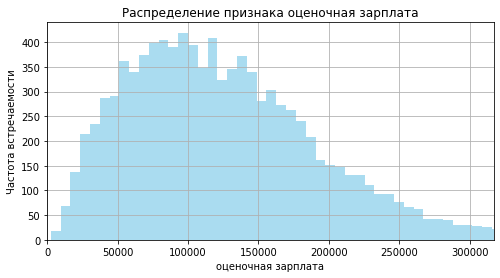

In [35]:
plt.figure(figsize=(8, 4))
plt.hist(banks['est_salary'].dropna(), bins=200, color='skyblue', alpha=0.7)
plt.title('Распределение признака оценочная зарплата')
plt.xlabel('оценочная зарплата')
plt.ylabel('Частота встречаемости')
plt.xlim(0, 317000)
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True) 
plt.show()

На этом этапе я вижу:
- распределение кредитного рейтинга выглядит близким к нормальному, мода в районе значения 900
- возраст - бОльшая часть клиентов в возрасте 25-45 лет, мода в районе 35 лет
- баланс на счете - бОльшая часть значений находится в пределах суммы на счете в 1,5млн
- зарплата - мода в районе 100тыс, бОльшая часть значений лежит в пределах до 300тыс, между 50 и 150тыс
- баллы собственности - мода - 0 баллов (около 2500 человек), распределение не выглядит нормальным, с увеличением кол-ва баллов начиная с 2 баллов растет и кол-во клиентов
- город - в Ярославле больше всего клиентов - более 6000, в Рыбинске почти 3000, в Ростове более 1000
- кол-во банковских продуктов - мода в районе 2 (около 5000)
- по полу распределение практически ровно 50 на 50
- количество банковских продуктов - большинство значений - это 1 и 2
- кредитная карта - более чем у 30 процентов клиентов ее нет, более чем у 60 процентов есть
- активность - около 4700 клиентов не были активны в отчетный период, около 5300 - активны, маловато активности получается
- отток - около 1800 человек в оттоке, остальные 8200 остались

#### Отдельно посмотрю распределение признака баланс 

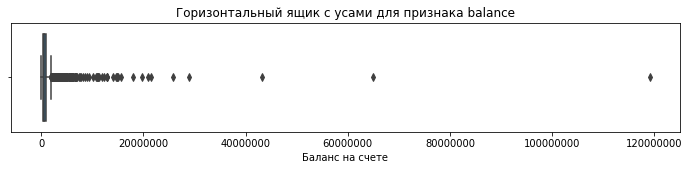

In [36]:
# Создам фигуры и оси для ящика с усами (горизонтально)
plt.figure(figsize=(12, 2))
sns.boxplot(data=banks, x='balance', orient='h')
plt.title('Горизонтальный ящик с усами для признака balance')
plt.xlabel('Баланс на счете')

# Отключу экспоненциальную форму оси x
plt.ticklabel_format(style='plain', axis='x')

plt.show()

Выбросы - серьезные. Есть несколько клиентов, у которых более 60 млн на счете. Это мешает посмотреть на основную часть графика

In [37]:
banks['balance'].describe()

count        7705.00
mean       827794.31
std       1980614.15
min             0.00
25%        295554.16
50%        524272.20
75%        980705.85
max     119113552.01
Name: balance, dtype: float64

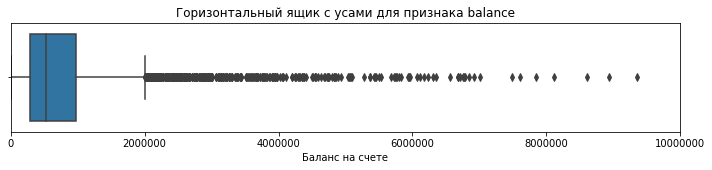

In [38]:
# Создаю фигуру и оси для ящика с усами (горизонтально)
plt.figure(figsize=(12, 2))
sns.boxplot(data=banks, x='balance', orient='h')
plt.title('Горизонтальный ящик с усами для признака balance')
plt.xlabel('Баланс на счете')

# Отключу экспоненциальную форму оси x
plt.ticklabel_format(style='plain', axis='x')

# Ограничение оси x
plt.xlim(0, 10000000)

plt.show()

In [39]:
#Посмотрю на перцентили
percentiles = [0.01, 0.05, 0.95, 0.99]
balance_percentiles = banks['balance'].quantile(percentiles)

In [40]:
balance_percentiles

0.01     23267.42
0.05    100104.32
0.95   2116704.78
0.99   4827443.49
Name: balance, dtype: float64

- ок, 99 процентов всех клиентов точно имеют на счету не более 5млн. Так картина стала понятнее.
- выбросы исключать не буду, иначе это повлияет на точность исследования

### Распределение признаков в разрезе оттока

 #### Смотрю средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (методом groupby())

In [41]:
# Использую метод groupby() для разделения данных на две группы по столбцу 'Churn'
churn_grouped = banks.groupby('churn')

# Считаю средние значения для каждой группы
average_values = churn_grouped.mean()

# Добавляю значения в дополнительном столбце "остался" и "ушел"
average_values['churn'] = average_values.index.map({0: 'остался', 1: 'ушел'})

In [42]:
average_values_t = average_values.T

In [43]:
average_values_t

churn,0,1
score,845.43,863.35
age,43.02,41.43
equity,2.37,3.76
balance,733982.59,1133993.27
products,1.76,2.38
credit_card,0.71,0.55
last_activity,0.48,0.70
est_salary,147783.20,148310.73
balance_missing,0.28,0.01
age_missing,0.00,0.00


Вывод: заметные различия в средних значениях:

- у тех, кто ушел, среднее кол-во баллов собственности - 3.8, а у тех, кто остался - заметно меньше - 2.37
- денег на балансе в среднем больше у тех, кто ушел (1,1 млн), чем у тех, кто остался (734 тыс)
- кол-во банковских продуктов у тех, кто ушел, тоже больше (2.38), чем у тех, кто остался (1.76)
- у тех, кто остался, вероятнее есть кредитная карта, чем у тех, кто ушел
- те, кто ушли, были более активны, чем те, кто остался
- интересно, что пропуски в балансе почти не присутствуют у тех, кто ушел

кстати, колонки balance_missing и age_missing мне уже не будут нужны, я их уберу

но только по среднему считать неправильно, нужно еще учесть пол, а это категориальное значение, для некоторых признаков нужно посчитать медиану, поэтому это только начало

In [44]:
banks = banks.drop(['age_missing', 'balance_missing'], axis=1)

In [45]:
banks.head(3) #check

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0


#### Строю графики распределения признаков в разрезе оттока

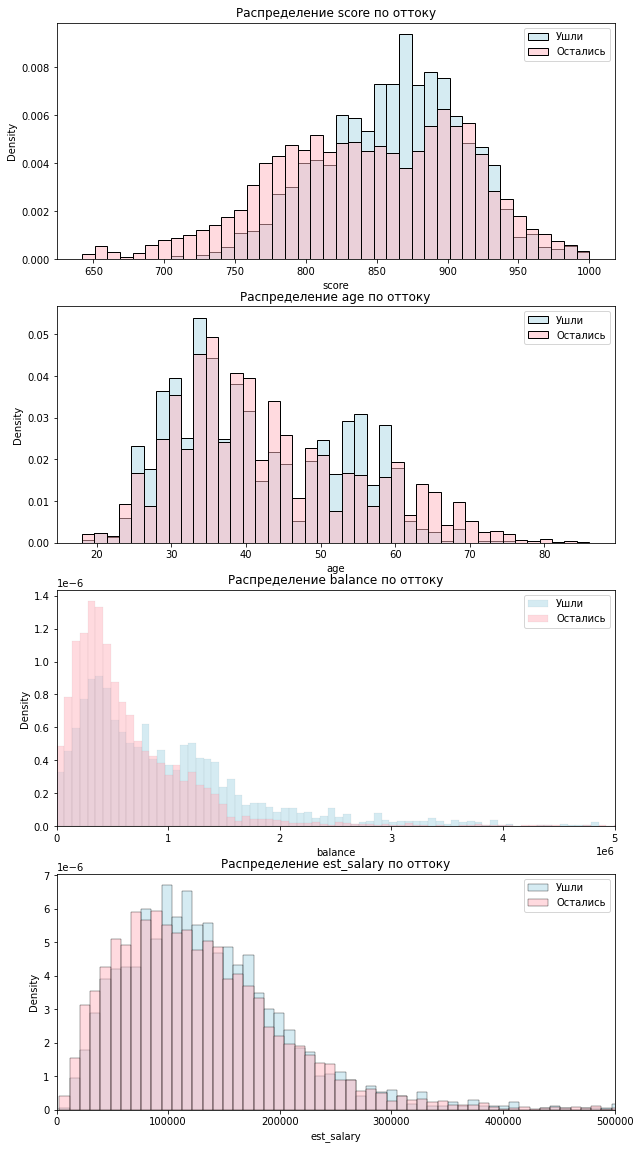

In [46]:
selected_features = [
 'score',
 'age',
 'balance',
 'est_salary',
]

x_lims = [None, None, (0, 5*10**6), (0, 5*10**5)]
colors = ['lightpink', 'lightblue']

fig, axes = plt.subplots(len(selected_features), 1, figsize=(10, 20))

for i, feature in enumerate(selected_features):
    sns.histplot(data=banks, x=feature, hue='churn', 
                 palette=colors, stat="density", common_norm=False, ax=axes[i])
    axes[i].set_title(f'Распределение {feature} по оттоку')
    axes[i].set_xlabel(feature)
    axes[i].legend(['Ушли', 'Остались'], loc='upper right')
    if x_lims[i]:
        axes[i].set_xlim(x_lims[i])

plt.show()

- наибольшее кол-во тех, кто ушёл, среди тех, у кого кредит рейтинг около 820-920 баллов
- по возрасту видим, что наиболее склонны к оттоку клиенты в возрасте в интервалах 25-40 и 50-60 лет
- по балансу на счете - больше всего отточных среди тех, у кого баланс около 500тыс, далее плотность отточных снижается,  большая часть отточных - среди тех у кого 300-800тыс
- по оценочной зарплате - большинство ушедших среди тех, кто получает около 100тыс, большая часть отточных имеют з/п 50-170тыс

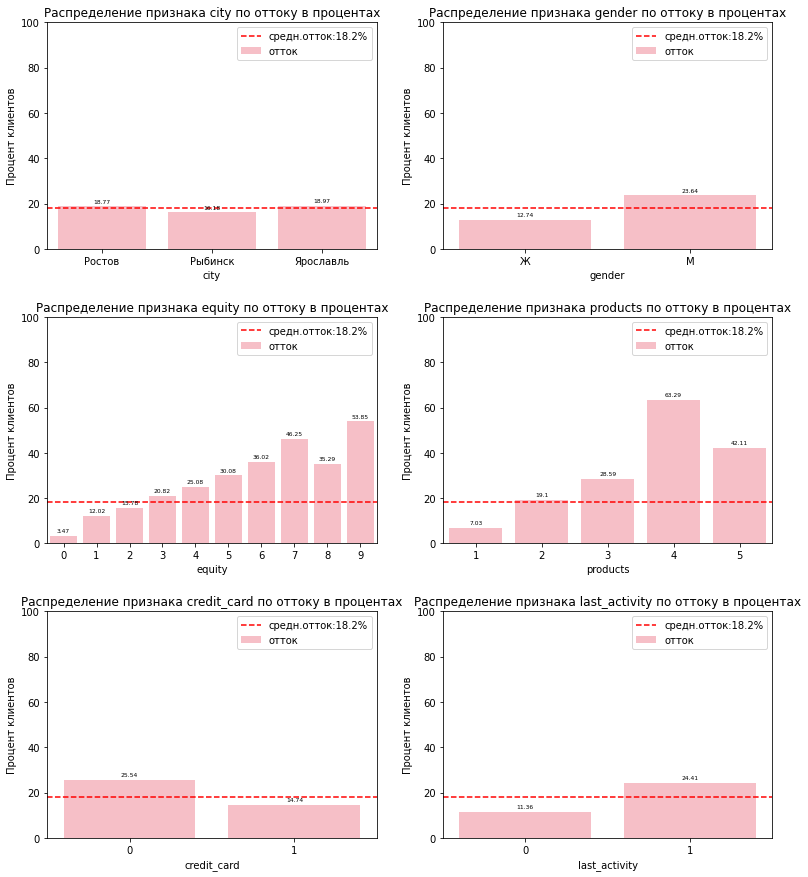

In [47]:
categorical_features = ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity']
colors = ['lightpink', '#EF761E']

# Считаю кол-во строк и столбцов для subplots
num_rows = len(categorical_features) // 2 + len(categorical_features) % 2
num_cols = 2

# Создаю фигуру и графики
fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 15))
fig.subplots_adjust(hspace=0.3)

# Вычисляем среднее значение оттока по всему банку
average_churn_rate = banks['churn'].mean() * 100  # Умножаем на 100, чтобы преобразовать в проценты

for idx, feature in enumerate(categorical_features):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    ax = axes[row_idx, col_idx]
    
    # Считаю процентное соотношение для каждой категории
    data_percent = banks.groupby(feature)['churn'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    data2 = data_percent[data_percent['churn'] == 1]
    data2 = data2.replace({'churn': {1: 'отток'}})
    data2['percent'] = round(data2['percent'], 2)

    
    sns.barplot(x=feature, y='percent', hue='churn', data=data2, palette=colors, ax=ax)
    ax.set_title(f'Распределение признака {feature} по оттоку в процентах')
    ax.set_xlabel(feature)
    ax.set_ylabel('Процент клиентов')
    ax.set_ylim(0, 100)
    
    # Добавляю горизонтальную линию для среднего значения оттока и сетку
    ax.axhline(average_churn_rate, color='red', linestyle='--', label=f'средн.отток:{average_churn_rate:.1f}%')
    
    
    ax.legend()
   # Добавляю численное значение над столбцами
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='center', fontsize=6, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    
# Удаляю пустые subplots, если есть
for idx in range(len(categorical_features), num_rows * num_cols):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    fig.delaxes(axes[row_idx][col_idx])


    plt.show()

<b>Распределение в разрезе оттока относительно среднего уровня оттока по банку:</b>
- распределение уровня оттока по городам примерно одинаковое, в пределах среднего уровня оттока
- по полу - среди женщин уровень оттока существенно ниже уровня оттока по банку, среди мужчин - существенно выше
- по кол-ву баллов недвижимости - четко видно, что чем больше баллов собственности, тем выше процент оттока. Процент оттока выше среднего уровня оттока по банку - среди клиентов с 3-9 баллами собственности. Но здесь нужно учитывать, что с увеличением кол-ва баллов собственности падает кол-во клиентов, поэтому например 9 баллов собственности всего у 13 клиентов, из них 7 ушли, а 6 остались = больше ушли, чем остались, но в численном выражении это небольшое кол-во клиентов. Однако они могут быть очень ценными, поэтому важно обратить внимание на связь оттока с кол-вом баллов собственности
- по кол-ву продуктов - только у тех, у кого 1 продукт, процент оттока ниже среднего по банку, у остальных - выше = надо повышать качество продуктов, тем самым удерживать клиентов
- по наличию кредитки - у кого кредитки нет, тот более склонен к оттоку - процент оттока выше среднего по банку. Процент оттока у тех, у кого кредитка есть - ниже среднего по банку
- по активности - уровень оттока активных выше, чем уровень оттока неактивных. кажется, люди пользуются продуктами и им что-то не нравится.


<b>Распределение в целом:</b>
- по городам - больше всего ушедших - из Ярославля, ну и не удивительно, ведь оттуда клиентов в принципе больше всего
- в целом распределение по городам по признаку ушел/остался - более-менее пропорциональное 1/5
- по полу - среди клиентов больше женщин примерно на 14% (4358 женщин против 3822 мужчин), а вот отточных мужчин сильно больше, чем женщин (1183 мужчины против 687 женщин, на 72% процента больше, чем женщин) = вывод - мужчины более склонны к оттоку 
- по кол-ву баллов собственности - больше всего оставшихся имеют 0,3,4,5 баллов, больше всего ушедших имеют 5,4,3 балла собственности
- по кол-ву банковских продуктов - больше всего оставшихся имеют 1,2 банковских продукта, больше всего тех, кто остался имеют 2 или 4 банковских продукта, причем среди тех, у кого 4 продукта ушедших явно больше, чем оставшихся (174 осталось и 300 ушло - солидная разница!)
- наличие кредитки - отточных среди тех, у кого кредитки нет - более чем в 2 раза больше, чем среди тех, у кого кредитка есть = есть основания предположить, что если есть карта, вероятность оттока будет сильно меньше
- активность отточных среди тех, был активен - в >2 раза больше, чем среди тех, активен не был = есть основания предположить, что если клиент активен, вероятность оттока будет сильно больше

### Анализ корреляции между признаками

- есть умеренная корреляция между оттоком и кол-вом баллов собственности (0.35)
- есть умеренная корреляция между оттоком и кол-вом банковских продуктов (0.44)

- есть слабая корреляция между оттоком и кредитным рейтингом, полом, возрастом, наличием кредитной карты, активностью 

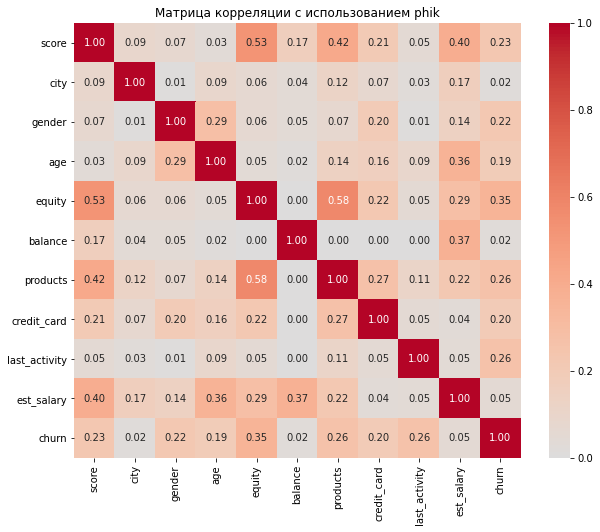

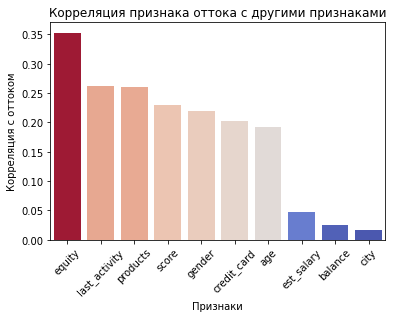

Корреляция и интерпретация связи с 'churn':
               churn Интерпретация
equity          0.35     Умеренная
last_activity   0.26        Слабая
products        0.26        Слабая
score           0.23        Слабая
gender          0.22        Слабая
credit_card     0.20        Слабая
age             0.19        Слабая
est_salary      0.05  Очень слабая
balance         0.02  Очень слабая
city            0.02  Очень слабая


In [48]:
# Указываю список непрерывных признаков
continuous = ['score', 'age', 'balance', 'est_salary']

# Вычисляю корреляцию с использованием phik
correlation_matrix = phik_matrix(banks, interval_cols=continuous)

# Создаю тепловую карту для всей матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title('Матрица корреляции с использованием phik')
plt.show()

# Удаляю корреляцию 'churn' с самим собой и сортирую по убыванию
correlation_without_self = correlation_matrix['churn'].drop('churn').sort_values(ascending=False)

# Создаю объект ScalarMappable с использованием нормализованных значений и палитры coolwarm
norm = Normalize(vmin=min(correlation_without_self), vmax=max(correlation_without_self))
mappable = ScalarMappable(norm=norm, cmap='coolwarm')

# Визуализирую отсортированную по убыванию корреляцию без 'churn' с самим собой
plt.figure(figsize=(6, 4))
bar_colors = [mappable.to_rgba(x) for x in correlation_without_self.values]
sns.barplot(x=correlation_without_self.index, y=correlation_without_self.values, palette=bar_colors)
plt.title('Корреляция признака оттока с другими признаками')
plt.xticks(rotation=45)
plt.xlabel('Признаки')
plt.ylabel('Корреляция с оттоком')
plt.show()

# Функция для интерпретации значения корреляции
def interpret_correlation(value):
    if 0 <= value < 0.1:
        return 'Очень слабая'
    elif 0.1 <= value < 0.3:
        return 'Слабая'
    elif 0.3 <= value < 0.5:
        return 'Умеренная'
    elif 0.5 <= value < 0.7:
        return 'Заметная'
    elif 0.7 <= value < 0.9:
        return 'Высокая'
    elif 0.9 <= value <= 1:
        return 'Очень высокая'
    else:
        return 'Не определено'

# Новый DataFrame для интерпретации корреляции с 'churn'
correlation_interpretation = pd.DataFrame(correlation_without_self, columns=['churn'])
correlation_interpretation['Интерпретация'] = correlation_interpretation['churn'].apply(interpret_correlation)

print("Корреляция и интерпретация связи с 'churn':")
print(correlation_interpretation)


Вывод скорректированный (дублирую, т к выводу теперь тут быть логичнее, тот что выше, потом уберу):

- есть умеренная корреляция между оттоком и кол-вом баллов собственности (0.35)
- есть умеренная корреляция между оттоком и кол-вом банковских продуктов (0.26) и активностью (0.26)
- есть слабая корреляция между оттоком и кредитным рейтингом, полом, возрастом, наличием кредитной карты

### Портрет клиента

In [49]:
# Группирую данные по столбцу 'churn' и считаю статистики 
portrait = banks.groupby('churn').agg({
    'score': ['mean', 'median'],
    'balance': ['mean', 'median'],
    'city': [('mode', lambda x: x.mode()[0] if not x.mode().empty else None)], 
    'gender': [('mode', lambda x: x.mode()[0] if not x.mode().empty else None)], 
    'equity': 'mean',
    'products': 'mean',
    'est_salary': 'mean',
    'age': 'median'
})

# Переименую столбцы
portrait.columns = ['_'.join(col).strip() if col[1] else col[0] for col in portrait.columns.values]

# Выберу нужные столбцы
columns_of_interest = ['score_mean', 'equity_mean', 'balance_mean', 
                       'est_salary_mean', 'products_mean']

# Считаю относительную разницу
relative_difference = (portrait.loc[1, columns_of_interest] - 
                       portrait.loc[0, columns_of_interest]) / portrait.loc[0, columns_of_interest] * 100

# Добавляю строки с относительной разницей
portrait.loc['относительная разница, %'] = relative_difference

# Меняю '0' и '1' на 'остался' и 'ушёл'
portrait.rename(index={0: "остался", 1: "ушёл", 2: "Относительная разница"}, inplace=True)

# Транспонирую DataFrame
portrait_t = portrait.T

# Замена NaN на "--"
portrait_t.fillna("--", inplace=True)

# Удаление имени индекса столбцов (там было churn))
portrait_t.columns.name = None

In [50]:
portrait_t

,остался,ушёл,"относительная разница, %"
score_mean,845.43,863.35,2.12
score_median,848.00,866.00,--
balance_mean,733982.59,1133993.27,54.50
balance_median,475382.45,782410.47,--
city_mode,Ярославль,Ярославль,--
gender_mode,Ж,М,--
equity_mean,2.37,3.76,58.50
products_mean,1.76,2.38,35.25
est_salary_mean,147783.20,148310.73,0.36
age_median,40.00,39.00,--


Среди тех кто ушёл и остался:
    
- денег на счете у тех, кто ушел, больше (в 1,5 раза), чем у тех, кто остался
- мужчин среди тех, кто ушел, почти в 1,5 раза больше, чем женщин
- кол-во баллов собственности у тех, кто ушел, сильно больше (на 58%), чем у тех, кто остался
- среднее кол-во продуктов у тех, кто ушел, больше (на 35%), чем у тех, кто остался

По другим признакам нет большой разницы между теми кто ушел и остался

Вывод по портретам клиентов из таблицы и графиков:


Тот, кто остался:
- имеет 760-940 баллов кредитного рейтинга
- проживает в любом из трех городов
- возраст 25-45 лет
- имеет 0 (преимущественно) или 3,4,5 баллов недвижимости
- имеет зарплату 100-200 тыс
- скорее женщина (мужчины в 2 раза более склонны к оттоку, чем женщины)
- имеет 1-2 банковских продукта
- имеет кредитную карту
- остаток на счете 0-15млн
- может быть или не быть активным


Тот, кто ушел:
- имеет 820-920 баллов кредитного рейтинга 
- проживает в любом из трех городов
- возраст 25-40 и 5-60 лет
- имеет 3,4 или 5 баллов недвижимости
- имеет зарплату в промежутке 50-170тыс
- скорее мужчина - (мужчины в 2 раза более склонны к оттоку, чем женщины)
- скорее всего имеет 2 банковских продукта, если брать шире - то 2-5 продуктов
- не имеет кредитную карту
- остаток на счете чаще всего 300-800тыс 
- скорее, был активен, чем нет = активные более склонны к оттоку



### Промежуточный вывод по итогам EDA

- посмотрела распределение признаков в целом (без деления на тех что ушли в отток и остались) - с помощью гистограмм, нормированных гистограмм, столбчатых диаграмм и ящиков с усами
- посмотрела распределения признаков в разрезе оттока относительно среднего значения оттока по банку (для непрерывных нашла отточные интервалы, категориальных/дискретных - конкретные значения). Выяснила это с помощью гистограмм, столбчатых диаграмм, нормированных гистограмм
- сделала в виде таблицы анализ портретов клиентов в разрезе оттока. В главном столбце - факт оттока. По каждому признаку посчитала подходящие и нужные для целей работы меры центральной тенденции в зависимости от типа признака
- сделала корреляционный анализ с помощью матрицы Phik и интерпретировала его результаты

Этот этап помог глубоко изучить данные и найти определенные взаимосвязи между признаками, а также выявить конкретные значения и интервалы, показатели, при которых можно предположить, что клиент будет склонен к оттоку => в результате сформулировать еще одну гипотезу + собрать массив идей для удачного формирования сегментов

## Проверка гипотез

### Гипотеза о различии дохода между теми клиентами, которые ушли и теми, которые остались

Формулирую гипотезу: 

- Нулевая гипотеза: доход между теми, кто ушёл и теми, кто остался, НЕ отличается, статистически значимых различий в доходе НЕТ
- Альтернативная гипотеза: доход между теми, кто ушёл и теми, кто остался, отличается в положительную или отрицательную сторону, имеются статистически значимые отличия 

В моих выборках есть выбросы, t-test не подходит, поэтому буду использовать тест Манна-Уитни:
- подходит, если распределение данных не является нормальным, 
- подходит для сравнения выборок разного размера, 
- устойчив к выбросам и непропорциональным эффектам в данных
- тест позволяет тестировать гипотезу о том, что одна выборка имеет тенденцию иметь более высокие или более низкие значения, чем другая, без указания направления = двустороннюю

Я вычислю значение t-статистики и p-value. Если p-value будет меньше выбранного мной уровня значимости (alpha=.05), то я смогу отвергнуть нулевую гипотезу и сделать вывод о статистически значимом различии между средним доходом для тех, кто ушел в отток и тех, кто остался.

In [51]:
# Создаю две выборки: одна для оттока, другая для оставшихся клиентов
churn_est_salary = banks[banks['churn'] == 1]['est_salary']
not_churn_est_salary = banks[banks['churn'] == 0]['est_salary']

In [52]:
# Провожу тест Манна-Уитни для дохода
u_statistic, p_value = st.mannwhitneyu(not_churn_est_salary, 
                                       churn_est_salary, 
                                       alternative='two-sided')
alpha = 0.05

# Оцениваю результаты
print("p-value:", p_value)

if p_value < alpha:
    print('''Отклоняем нулевую гипотезу: различия в доходе среди ушедших 
и оставшихся клиентов являются статистически значимыми''')
else:
    print('''Не отклоняем нулевую гипотезу: различия в доходе среди ушедших 
и оставшихся клиентов не являются статистически значимыми''')


p-value: 0.00021160652203623057
Отклоняем нулевую гипотезу: различия в доходе среди ушедших 
и оставшихся клиентов являются статистически значимыми


Вывод: статистически значимые различия между доходом тех, кто ушел и остался - есть = можно сказать, что их зарплата различается!

### Гипотеза о том, влияет ли кол-во недвижимости на склонность к оттоку

Формулирую гипотезу:

- Нулевая гипотеза: кол-во баллов недвижимости у оставшихся клиентов такое же, как у тех, кто ушел
- Альтернативная гипотеза: кол-во баллов недвижимости у оставшихся клиентов и у тех, кто ушел отличается в положительную или отрицательную сторону


Для проверки этой гипотезы использую t-тест, препятствий для его использования нет, помимо прочего выбросов в данных нет. т-тест нужен для сравнения средних значений двух выборок и поможет определить, есть ли статистически значимая разница между ними. Т к у меня есть две выборки (те, кто ушли в отток и те, кто остались), t-тест поможет оценить, насколько вероятно, что разница в кол-ве недвижимости случайна или она статистически значима.

Я вычислю значение t-статистики и p-value. Если p-value будет меньше выбранного мной уровня значимости (alpha=.05), то я смогу отвергнуть нулевую гипотезу и сделать вывод о статистически значимом различии между средним кол-вом недвижимости для тех, кто ушел в отток, и тех, кто остался.

In [53]:
# Создам две выборки: одна для оставшихся клиентов, другая для ушедших в отток
stay_equity = banks[banks['churn'] == 0]['equity']
churn_equity = banks[banks['churn'] == 1]['equity']

alpha = 0.05  # Уровень значимости

# Проведу t-тест
t_statistic, p_value = st.ttest_ind(stay_equity, churn_equity, equal_var=False)  # Указываем equal_var=False

# Оцениваю результаты
if p_value < alpha:
    print('''Отклоняем нулевую гипотезу: средние значения количества баллов недвижимости 
    различаются среди оставшихся и ушедших клиентов''')
else:
    print('''Не отклоняем нулевую гипотезу: средние значения количества баллов недвижимости 
    не различаются среди оставшихся и ушедших клиентов''')


Отклоняем нулевую гипотезу: средние значения количества баллов недвижимости 
    различаются среди оставшихся и ушедших клиентов


Вывод: кол-во баллов недвижимости влияет на склонность к оттоку

### Выводы по гипотезам

Проверив две гипотезы, я могу устверждать, что:
- уровень зарплаты и количество баллов собственности влияют на отток 

## Промежуточные выводы

По итогам EDA, корреляц анализа, проверки гипотез, вижу следующее:
- средний возраст всех клиентов 42 года, отточные в возрасте 25-40 лет или 50-60 лет
- кредитка есть у 68% клиентов
- 52% клиентов были активны в отчетный период
- уровень оттока по банку около 18%
- бОльшая часть клиентов в возрасте 25-45 лет, мода в районе 35 лет
- в Ярославле больше всего клиентов - более 6000, оттуда и ушедших в фактическом выражении (но не в процентном соотношении) ушедших больше всего
- 99 процентов всех клиентов имеют на счету не более 5млн

я могу выделить признаки, которые так или иначе связаны с оттоком. Это:
- <b>деньги на балансе</b>. в среднем их больше у тех, кто ушел (1,1 млн), чем у тех, кто остался (734 тыс)
- <b>кол-во банковских продуктов</b>. У тех, кто ушел, продуктов больше (2.38), чем у тех, кто остался (1.76).только у тех, у кого 1 продукт, процент оттока ниже среднего по банку, у остальных - выше = надо повышать качество продуктов, тем самым удерживать клиентов
- <b>наличие кредитки</b>. у тех, кто остался, вероятнее есть кредитная карта, чем у тех, кто ушел. у кого кредитки нет, тот более склонен к оттоку - процент оттока выше среднего по банку. Процент оттока у тех, у кого кредитка есть - ниже среднего по банку
- <b>активность</b>. те, кто ушли, были более активны, чем те, кто остался. уровень оттока активных выше, чем уровень оттока неактивных. кажется, люди пользуются продуктами и им что-то не нравится.
- <b>пол</b> - среди клиентов больше женщин примерно на 14% (4358 женщин против 3822 мужчин), а вот отточных мужчин сильно больше, чем женщин (1183 мужчины против 687 женщин, на 72% процента больше, чем женщин). среди женщин уровень оттока существенно ниже уровня оттока по банку, среди мужчин - существенно выше
- <b>кол-во баллов собственности</b>. больше всего оставшихся имеют 0,3,4,5 баллов, больше всего ушедших имеют 5,4,3 балла собственности. чем больше баллов собственности, тем выше процент оттока. среднее кол-во баллов собственности - 3.8, а у тех, кто остался - заметно меньше - 2.37
- <b>кредитный рейтинг</b>. уровень корреляции слабый, но он есть (0,23)
- <b>возраст</b>. уровень корреляции слабый, но он есть (0,19)
- <b>уровень зарплаты</b> также влияет на отток


Этот этап помог глубоко изучить данные и найти определенные взаимосвязи между признаками, а также выявить конкретные значения и интервалы, показатели, при которых можно предположить, что клиент будет склонен к оттоку => собрать массив идей для удачного формирования сегментов

## Сегментация 

На основе исследовательского анализа я выявила те значения признаков, которые дали мне идеи для сегментации клиентов

### Сегмент 1. Женщины 25-45 без кредитки

In [54]:
# Создам подвыборку клиентов, удовлетворяющих условиям
filtered_women = banks[
    (banks['gender'] == 'Ж') &
    (banks['est_salary'] >= 80000) &
    (banks['est_salary'] <= 220000) &
    (banks['credit_card'] == 0) &
    (banks['products'] >= 2) &
    (banks['products'] <= 3) &
    (banks['age'] >= 25) &
    (banks['age'] <= 45) &
    (banks['balance'] < 5000000)
]

# Считаю общее кол-во женщин, которые подходят по условию 
total_women = len(filtered_women)

# Считаю кол-во женщин, которые ушли
churned_women = len(filtered_women[filtered_women['churn'] == 1])

# Считаю кол-во женщин, которые остались
retained_women = len(filtered_women[filtered_women['churn'] == 0])

# Считаю процент оттока
churn_percentage_women = (churned_women / total_women) * 100

print("Всего клиентов в сегменте:", total_women)
print("Количество ушедших клиентов:", churned_women)
print("Количество оставшихся клиентов:", retained_women)
print("Процент оттока в сегменте:", churn_percentage_women)

Всего клиентов в сегменте: 509
Количество ушедших клиентов: 125
Количество оставшихся клиентов: 384
Процент оттока в сегменте: 24.557956777996072


- пол - Ж
- возраст 25-45
- зарплата 60-200тыс
- кредитки нет
- кол-во банковских продуктов - 2 или 3
- на балансе менее 5млн

Получается это женщины в активном возрасте, когда многие работают, и они работают, доход не менее 80к, на пике сил. Кредитками они не пользуются, но пользуются другими продуктами банка, супермного денег на счете пока не накопили 


### Сегмент 2. Мужчины 25-45 без кредитки

In [55]:
# Создам подвыборку клиентов, удовлетворяющих условиям
filtered_men = banks[
    (banks['gender'] == 'М') &
    (banks['est_salary'] >= 75000) &
    (banks['est_salary'] <= 350000) &
    (banks['credit_card'] == 0) &
    (banks['products'] >= 2) &
    (banks['products'] <= 4) &
    (banks['age'] >= 25) &
    (banks['age'] <= 45) &
    (banks['balance'] < 10000000)
]

# Считаю общее кол-во мужчин, которые подходят по условию 
total_men = len(filtered_men)

# Считаю кол-во женщин, которые ушли
churned_men = len(filtered_men[filtered_men['churn'] == 1])

# Считаю кол-во женщин, которые остались
retained_men = len(filtered_men[filtered_men['churn'] == 0])

# Считаю процент оттока
churn_percentage_men = (churned_men / total_men) * 100

print("Всего клиентов в сегменте:", total_men)
print("Количество ушедших клиентов:", churned_men)
print("Количество оставшихся клиентов:", retained_men)
print("Процент оттока в сегменте:", churn_percentage_men)

Всего клиентов в сегменте: 508
Количество ушедших клиентов: 236
Количество оставшихся клиентов: 272
Процент оттока в сегменте: 46.45669291338583


- пол М
- возраст 25-45
- з/п 90-500к
- кредитки нет
- на счете не более 10млн
- кол-во банковских продуктов - 2-4

Получается это молодые мужчины в активном возрасте, и они работают, доход не менее 75к и выше - до 350к. Кредитками они не пользуются, но пользуются другими продуктами банка в кол-ве 2-4, на счете накопили сумму до 10млн

### Сегмент 3. Активные с невысоким доходом <100000

In [56]:
# Создам подвыборку клиентов, удовлетворяющих условиям
filtered_low = banks[
    (banks['est_salary'] <= 100000) &
    (banks['age'] >= 25) &
    (banks['age'] <= 60) &
    (banks['credit_card'] == 0) &
    (banks['last_activity'] == 1) &
    (banks['balance'] < 5000000)
]

# Считаю общее кол-во клиентов, которые подходят по условию 
total_low = len(filtered_low)

# Считаю кол-во клиентов, которые ушли
churned_low = len(filtered_low[filtered_low['churn'] == 1])

# Считаю кол-во клиентов, которые остались
retained_low = len(filtered_low[filtered_low['churn'] == 0])

# Считаю процент оттока
churn_percentage_low = (churned_low / total_low) * 100

print("Всего клиентов в сегменте:", total_low)
print("Количество ушедших клиентов:", churned_low)
print("Количество оставшихся клиентов:", retained_low)
print("Процент оттока в сегменте:", churn_percentage_low)

Всего клиентов в сегменте: 504
Количество ушедших клиентов: 173
Количество оставшихся клиентов: 331
Процент оттока в сегменте: 34.32539682539682


- клиенты обоих полов
- доход до 100к
- возраст 25-60
- без кредитки
- активные
- на счете не более 5млн

Это люди обоих полов, в активном возрасте 25-60 лет, с доходом относительно небольшим - до 100к, без кредитки, с кол-вом денег на счете не более 5млн, активные клиенты банка

### Сегмент 4. С высоким кредитом доверия и 1,5млн на счете

In [57]:
# Создам подвыборку клиентов, удовлетворяющих условиям
filtered_score = banks[
    (banks['score'] >= 800) &
    (banks['score'] <= 900) &
    (banks['age'] >= 30) &
    (banks['age'] <= 60) &
    (banks['credit_card'] == 0) &
    (banks['last_activity'] == 1) &
    (banks['balance'] < 1500000)
]
# Считаю общее кол-во клиентов, которые подходят по условию 
total_score = len(filtered_score)

# Считаю кол-во клиентов, которые ушли
churned_score = len(filtered_score[filtered_score['churn'] == 1])

# Считаю кол-во клиентов, которые остались
retained_score = len(filtered_score[filtered_score['churn'] == 0])

# Считаю процент оттока
churn_percentage_score = (churned_score / total_score) * 100

print("Всего клиентов в сегменте:", total_score)
print("Количество ушедших клиентов:", churned_score)
print("Количество оставшихся клиентов:", retained_score)
print("Процент оттока в сегменте:", churn_percentage_score)

Всего клиентов в сегменте: 610
Количество ушедших клиентов: 288
Количество оставшихся клиентов: 322
Процент оттока в сегменте: 47.21311475409836


- клиенты обоих полов
- кредитный рейтинг высокий 800-900, можно сказать это дисциплинированные и ответственные люди
- возраст 30-60 - возвраст активно работающего человека
- без кредитки
- активные
- на счету у них менее 1,5 млн

Это люди обоих полов, ответственно пользующиеся продуктами банка, они активны, но кредитки у них нет, на счете тоже не супермного денег - не более 1,5 млн

## Приоритизация сегментов + таргетированные рекомендации

Приоритизация по оттоку выглядит наиболее логичной

### Сегмент 4. С высоким кредитом доверия и 1,5млн на счете. Отток 47,21%

Это люди обоих полов, ответственно пользующиеся продуктами банка, они активны, но кредитки у них нет, на счете тоже не супермного денег - не более 1,5 млн

Процент оттока высокий, важно постараться их удержать

Рекомендации/идеи по удержанию:
- учитывая высокий кредитный рейтинг, предложить кредитную карту с низкой процентной ставкой, высоким кешбеком и более высоким кредитным лимитом, чем стандартные предложения. = и они будут пользоваться услугами с привилегями, и мы будем знать, что они и не уйдут, и кредит отдадут
- предложить специальные вклады с высоким процентом, которые будут стимулировать к долгосрочному накоплению и инвестированию. Людям будет приятно копить деньги на выгодных услових и это помешает оттоку
- предложить бонусы за открытие кредитной карты, вклада или инвестирование в фонды банка
- предложить им выгодные условия при обслуживании дебетовых карт - у этих клиентов очень высокий отток, и их надо удерживать обязательно, и надо дать им бесплатные (обслуживание) дебетовые карты, с которых можно без комиссии снять деньги в любом банкомате, сделать перевод также без комиссии
- выделить приоритетную линию в коллцентре, чтобы люди долго не ждали в очереди на линии


### Сегмент 2. Мужчины 25-45 без кредитки. Отток 46,45%

Это молодые мужчины в активном возрасте, и они работают, доход не менее 75к и выше - до 350к. Кредитками они не пользуются, но пользуются другими продуктами банка в кол-ве 2-4, на счете накопили сумму до 10млн

Рекомендации/идеи по удержанию:
- заключить партнерский договор с маркетплейсом/сетью заправок/фитнес центром, чтобы предложить клиентам скидки при оплате картой банка (как сейчас яндекс маркет + альфа)
- предложить брокерские услуги на специальных условиях + обучение в подарок, чтобы вызвать интерес к инвестированию свободных средств
- предложить повышенный процент дохода по вкладу более 5млн
- программы страхования + акции, стимулирующие взять ипотеку = купи дом, страховка на год в подарок
- специальные условия при накоплении миль для тех, кто много путешествует


### Сегмент 3. Активные доход менее 100к. Отток 34,32%

Это люди обоих полов, в активном возрасте 25-60 лет, с доходом относительно небольшим - до 100к, без кредитки, с кол-вом денег на счете не более 5млн, активные клиенты банка


Рекомендации/идеи по удержанию:

- расширенная линейка вкладов под средний процент, но зато с пополнением и снятием в любое время
- разработать удобную вкладку в приложении, где предложить клиентам эффективно распределить средства и незаметно копить деньги (вкладка с кодовым названием "Заначка":) = сделать продукт, дисциплинирующий и могущий порадовать даже в мелочах, даже небольшими накоплениями
- кешбек при покупках в сетевых супермаркетах типа пятерочка, магнит, дикси
- кешбек при оплате картой на популярных заправках, в кафе

### Сегмент 1. Женщины 25-45 без кредитки. Отток 24,5%

Это женщины в активном возрасте, когда многие работают, и они работают, доход не менее 80к, на пике сил. Кредитками они не пользуются, но пользуются другими продуктами банка, супермного денег на счете пока не накопили 



Из того, что указано для мужчин, подойдет опция "скидки на маркетплейсах при оплате картой банка", а также:

- что-то общего профиля, но брендированное под женщин, например "индивидуальный финансовый планировщик для финансово независимой женщины": предложить услуги персонального финансового консультанта, который поможет клиенткам оптимизировать свои финансовые решения и планировать будущее
- бонусы и награды при покупках картой банка в продуктовых: стимулировать к покупке через патнерские программы лояльности с бонусами и наградами 
- поддержка при планировании крупных покупок: предложить помощь при планировании крупных покупок, таких как недвижимость или автомобиль, с выгодными условиями кредитования + в приложении делать сторис с предложениями взять кредит на покупку, которая завтра точно обойдется дороже
- страховка "мама и ребенок" - при покупке страховки для женщины - будет скидка для ребенка

### Дополнительно:

Всем сегментам можно предложить рефинансировать кредит в нашем банке, предложить погасить кредит в другом банке и взять кредит у нас, а удерживать бесплатным обслуживанием карт + удобным приложением в том числе с развлечениями, например, стимулирующими финансовыми играми (типа слабо накопить за месяц? сможешь накопить - получишь скидку от партнера)


Также стоит <b>обратить внимание на качество банковских продуктов </b> - 
если те, кто ими активно пользуются, не менее активно уходят из банка - 
значит, что-то не так, нужно улучшать качество обслуживания.

## Вывод

что было сделано:

- был исследован датафрейм из 10000 строк, с пропусками в двух столбцах balance и age
- привела названия колонок к нужному виду
- выяснила природу пропусков и решила оставить их без изменений
- для анализа природы пропусков сделала два дополнительных столбца с бинарными признаками 1 и 0. Затем их удалила
- проанализировала признаки с помощью столбчатых гистограмм, столбчатых диаграмм, изучила их в целом по датасету и в разрезе оттока
- изучила корреляцию признаков с оттоком с помощью матрицы корреляции phik
- проанализировала степень корреляции по шкале Чеддока
- сделала таблицу-портрет клиента с признаками и соответствующими мерами центральной тенденции
- выявила основные признаки, которые влияют на отток
- сделала сегментацию клиентов по признакам, выделила 4 сегмента
- приоритизировала сегменты и сделала рекомендации для отдела маркетинга по каждому сегменту  
- сделала выводы в формате презентации (презентацию сделаю по итогам первого ревью, чтобы не переделывать много, если что)

какие сделаны выводы:
основные признаки, которые так или иначе связаны с оттоком. Это:
- среднее кол-во баллов собственности 
- деньги на балансе. в среднем их больше у тех, кто ушел, чем у тех, кто остался
- кол-во банковских продуктов. У тех, кто ушел, продуктов больше, чем у тех, кто остался
- наличие кредитки. у тех, кто остался, вероятнее есть кредитная карта, чем у тех, кто ушел
- активность. те, кто ушли, были более активны, чем те, кто остался
- по полу - среди клиентов больше женщин, при этом отточных мужчин сильно больше, чем женщин 
- кол-во баллов собственности

## Презентация

Структура презентации:
- Вступление: название проекта, цель, краткое описание.
- Описание данных.
- Графики распределения признаков в разрезе оттока (только по сегментирующим признакам).
- Портрет клиента - таблица и интерпретация.
- Корреляция - столбец для оттока и интерпретация.
- Гипотезы - какие проверяли и какой результат получили.
- Сегментация - на один сегмент выделяется один слайд, где указываются признаки и
значения/интервалы их формирования, размер сегмента, уровень оттока внутри сегмента, а
также рекомендации. Слайды сегментации располагаются согласно приоритизации.
- Заключительный слайд


Ссылка на презентацию https://disk.yandex.ru/i/Kmj1xccq-Gkm7g